## Working with QTM in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/08_qtm.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/08_qtm.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/08_qtm.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/08_qtm.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [ ]:
# %pip install vgrid --upgrade

### latlon2qtm

In [1]:
from vgrid.conversion.latlon2dggs import latlon2qtm

lat = 10.775276
lon = 106.706797
res = 14
qtm_id = latlon2qtm(lat, lon, res)
qtm_id

'42012323131211'

### QTM to Shapely Polygon

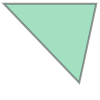

In [2]:
from vgrid.conversion.dggs2geo.qtm2geo  import qtm2geo

qtm_geo = qtm2geo(qtm_id)
qtm_geo

### QTM to GeoJSON        

In [3]:
from vgrid.conversion.dggs2geo.qtm2geo import qtm2geojson

qtm_geojson = qtm2geojson(qtm_id)
qtm_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': (((106.70909228465132, 10.7666015625),
      (106.71146419641514, 10.777587890625),
      (106.6985891412885, 10.777587890625),
      (106.70909228465132, 10.7666015625)),)},
   'properties': {'qtm': '42012323131211',
    'resolution': 14,
    'center_lat': 10.7739258,
    'center_lon': 106.7063819,
    'avg_edge_len': 1440.993,
    'cell_area': 855603.691,
    'cell_perimeter': 4322.978}}]}

### Vector to QTM

Processing features: 100%|██████████| 4/4 [00:00<00:00, 75.15it/s]


<Axes: >

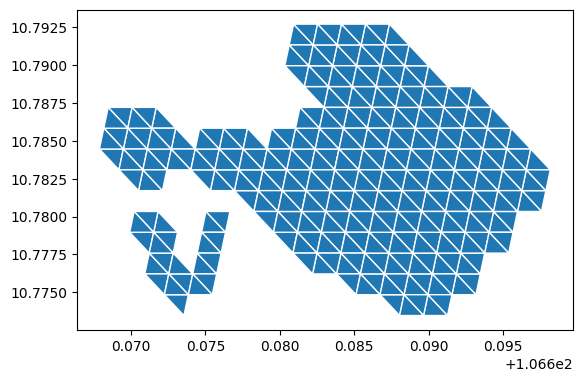

In [4]:
from vgrid.conversion.vector2dggs.vector2qtm import vector2qtm

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon.geojson"
)
vector_to_qtm = vector2qtm(file_path, resolution=17, compact=False, 
                            predicate = "intersects", output_format="gpd")
# Visualize the output
vector_to_qtm.plot(edgecolor="white")

### QTM Compact

<Axes: >

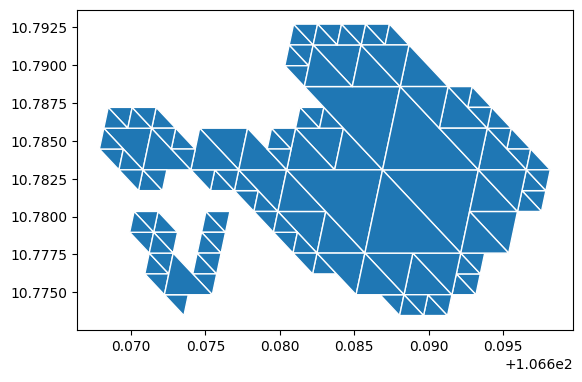

In [5]:
from vgrid.conversion.dggscompact import qtmcompact

qtm_compacted = qtmcompact(vector_to_qtm, qtm_id="qtm", output_format="gpd")
qtm_compacted.plot(edgecolor="white")

### QTM Expand

<Axes: >

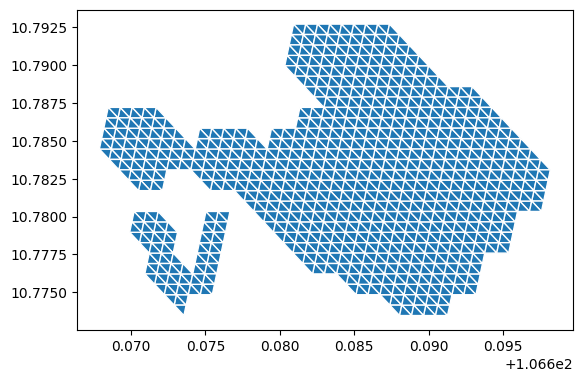

In [6]:
from vgrid.conversion.dggscompact import qtmexpand

qtm_expanded = qtmexpand(vector_to_qtm, resolution=18, qtm_id="qtm", output_format="gpd")
qtm_expanded.plot(edgecolor="white")

### QTM Binning

Generating QTM DGGS: 100%|██████████| 16/16 [00:00<00:00, 153.29it/s]


<Axes: >

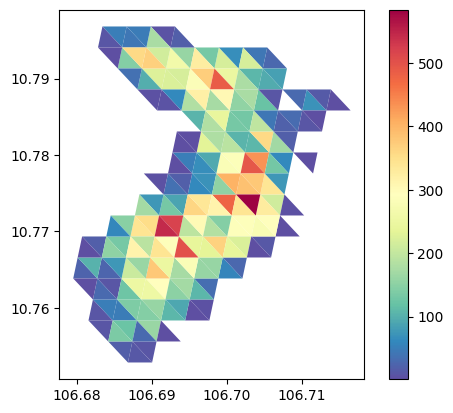

In [10]:
from vgrid.binning.qtmbin import qtmbin
import geopandas as gpd
file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats = "count"
qtm_bin = qtmbin(file_path, resolution=16, stats=stats, 
                # numeric_field="confidence",
                # category="category",
                output_format="gpd")
qtm_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)

### Raster to QTM

In [ ]:
# %pip install folium

In [11]:
from vgrid.conversion.raster2dggs.raster2qtm import raster2qtm
from vgrid.utils.io import download_file          

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)

raster_to_qtm =  raster2qtm(raster_file,output_format="gpd")

# Visualize the output
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=28)

qtm_layer = folium.GeoJson(
    raster_to_qtm,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 1,
    },
    popup=folium.GeoJsonPopup(
        fields=["qtm", "band_1", "band_2", "band_3"],
        aliases=["QTM ID", "Band 1", "Band 2", "Band 3"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(qtm_layer.get_bounds())

# Display the map
m

WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db
WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db


rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.
Nearest qtm resolution determined: 24


Converting raster to QTM: 100%|██████████| 3711/3711 [00:00<00:00, 7855.96 cells/s]


### QTM Generator

Generating QTM DGGS: 100%|██████████| 3/3 [00:00<00:00, 205.75it/s]


<Axes: >

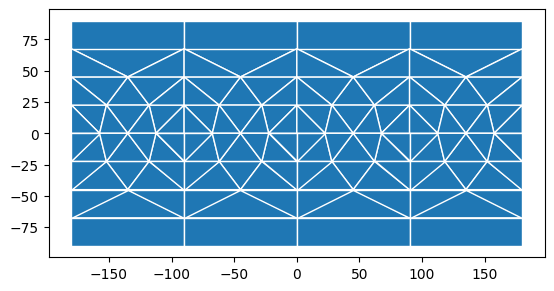

In [12]:
from vgrid.generator.qtmgrid import qtmgrid
qtm_grid = qtmgrid(resolution=3,output_format="gpd")
# qtm_grid = qtmgrid(resolution=18,bbox=[106.699007, 10.762811, 106.717674, 10.778649],output_format="gpd")
qtm_grid.plot(edgecolor='white')

### QTM Inspect

In [13]:
from vgrid.stats.qtmstats import qtminspect
resolution = 6
qtm_inspect = qtminspect(resolution)
qtm_inspect.head()

Generating QTM DGGS: 100%|██████████| 6/6 [00:00<00:00,  6.22it/s]


qtm  resolution  center_lat  center_lon  avg_edge_len     cell_area  \
0   1           6        45.0      -135.0  1.000756e+07  6.375820e+13   
1   2           6        45.0       -45.0  1.000756e+07  6.375820e+13   
2   3           6        45.0        45.0  1.000756e+07  6.375820e+13   
3   4           6        45.0       135.0  1.000756e+07  6.375820e+13   
4   5           6       -45.0      -135.0  1.000756e+07  6.375820e+13   

   cell_perimeter                                           geometry  crossed  \
0     30022685.63  POLYGON ((-180 0, -90 0, -90 90, -180 90, -180...    False   
1     30022685.63        POLYGON ((-90 0, 0 0, 0 90, -90 90, -90 0))    False   
2     30022685.63            POLYGON ((0 0, 90 0, 90 90, 0 90, 0 0))    False   
3     30022685.63       POLYGON ((90 0, 180 0, 180 90, 90 90, 90 0))    False   
4     30022685.63  POLYGON ((-180 -90, -90 -90, -90 0, -180 0, -1...    False   

   norm_area       ipq       zsc  
0      512.5  0.888888  0.882057  
1      512.5  0.888888  0.882057  
2      512.5  0.888888  0.882057  
3      512.5  0.888888  0.882057  
4      512.5  0.888888  0.882057

### Distribution of QTM Area Distortions

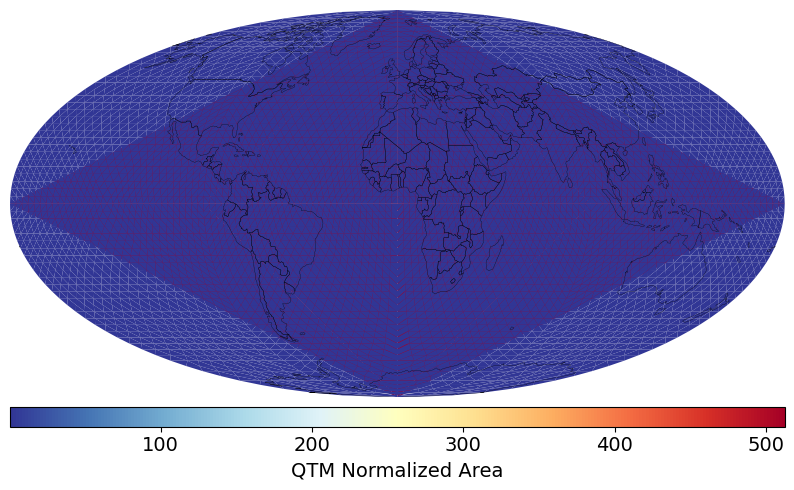

In [14]:
from vgrid.stats.qtmstats import qtm_norm_area
qtm_norm_area(qtm_inspect)

### Distribution of QTM IPQ Compactness

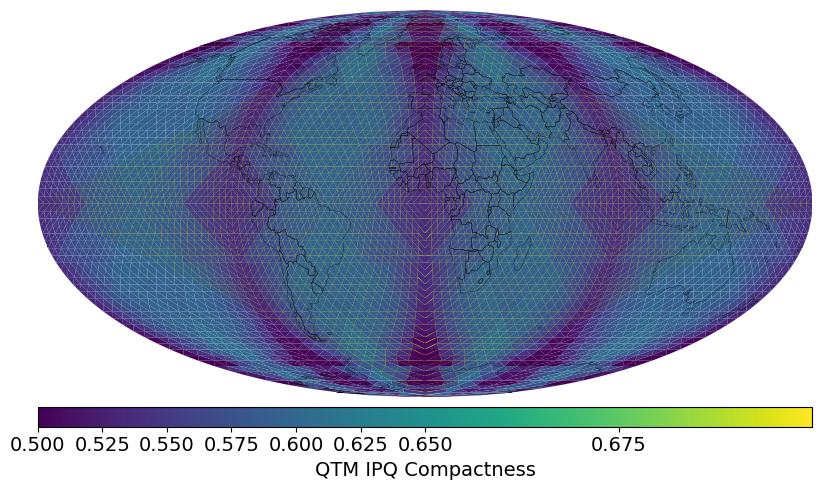

In [15]:
from vgrid.stats.qtmstats import qtm_compactness
qtm_compactness(qtm_inspect)

### QTM Statistics

In [16]:
from vgrid.stats import qtmstats
qtmstats('km')

resolution  number_of_cells  avg_edge_len_km  avg_cell_area_km2
0            1                8     12134.383498       6.375820e+07
1            2               32      6067.191749       1.593955e+07
2            3              128      3033.595875       3.984888e+06
3            4              512      1516.797937       9.962219e+05
4            5             2048       758.398969       2.490555e+05
5            6             8192       379.199484       6.226387e+04
6            7            32768       189.599742       1.556597e+04
7            8           131072        94.799871       3.891492e+03
8            9           524288        47.399936       9.728730e+02
9           10          2097152        23.699968       2.432182e+02
10          11          8388608        11.849984       6.080456e+01
11          12         33554432         5.924992       1.520114e+01
12          13        134217728         2.962496       3.800285e+00
13          14        536870912         1.481248       9.500713e-01
14          15       2147483648         0.740624       2.375178e-01
15          16       8589934592         0.370312       5.937945e-02
16          17      34359738368         0.185156       1.484486e-02
17          18     137438953472         0.092578       3.711216e-03
18          19     549755813888         0.046289       9.278040e-04
19          20    2199023255552         0.023144       2.319510e-04
20          21    8796093022208         0.011572       5.798775e-05
21          22   35184372088832         0.005786       1.449694e-05
22          23  140737488355328         0.002893       3.624234e-06
23          24  562949953421312         0.001447       9.060586e-07